# Assignment 3 - ANOVA

5PAM2024 - Statistical Modelling

Name Surname Student ID

---

A controlled clinical trial was set up to investigate effects of two different drugs, to assess the relative benefits of competing drug administration strategies, and to establish the optimal treatment strategy. The clinical data were recorded in relative units (greater values – better results), and are given in a csv file in the following form:

$$
\begin{array}{lccc}
&  \text{Drug A} & \text{Drug B} & \text{Control} \\ \hline
& y_{111} & y_{211} & y_{311} \\
\text{Strategy 1} & \vdots & \vdots & \vdots \\
& y_{11n} & y_{21n} & y_{31n} \\ \hline
& y_{121} & y_{221} & y_{321} \\
\text{Strategy 2} & \vdots & \vdots & \vdots \\
& y_{12n} & y_{22n} & y_{32n} \\ \hline
\end{array}
$$

<br>

Your tasks are:

- to investigate if there are statistically significant differences
    - between effects of the three treatment groups, and
    - between effects of the two blocks
- to use linear contrasts to investigate if there are statistically significant differences
    - between effects of the control group and both drug groups (i.e. control vs drug A and B), and
    - between effects of the two drug groups (i.e. drug A vs drug B)

You should approach these tasks using additive and interacting two-way ANOVA models. Use α=5%.<br>
All computations must be done manually. You can use built-in statistical functions to verify your results and for graphical analysis only.

---

## 1. Additive Two-way ANOVA

### 1.1. Analysis of the group and block effects

In [1]:
# Test the significance of group and block effects - 2 marks

# Load required libraries
library(dplyr)
library(tidyr)

# Load the dataset
url <- "https://raw.githubusercontent.com/uqglmn/sm/refs/heads/main/A3/A3_09.csv"
data <- read.csv(url)

# Reshape data from wide to long format
data_long <- data %>%
  pivot_longer(cols = c(DrugA, DrugB, Control),
               names_to = "Treatment",
               values_to = "Value") %>%
  mutate(Strategy = factor(Strategy, levels = c("S1", "S2")),
         Treatment = factor(Treatment, levels = c("DrugA", "DrugB", "Control")))

# Verify data structure
cat("Total observations:", nrow(data_long), "\n")
print(table(data_long$Strategy, data_long$Treatment))
print(head(data_long))

# Compute cell means
cell_means <- data_long %>%
  group_by(Strategy, Treatment) %>%
  summarise(mean = mean(Value), .groups = "drop")
print(cell_means)

# Marginal means for strategies
strategy_means <- data_long %>%
  group_by(Strategy) %>%
  summarise(mean = mean(Value), .groups = "drop")

# Marginal means for treatments
treatment_means <- data_long %>%
  group_by(Treatment) %>%
  summarise(mean = mean(Value), .groups = "drop")

# Grand mean
grand_mean <- mean(data_long$Value)

# Parameters
I <- 2  # Number of strategies
J <- 3  # Number of treatments
n <- 15  # Replicates per cell

# Sum of Squares
# SS_A: Strategies
SS_A <- J * n * sum((strategy_means$mean - grand_mean)^2)

# SS_B: Treatments
SS_B <- I * n * sum((treatment_means$mean - grand_mean)^2)

# SST: Total
SST <- sum((data_long$Value - grand_mean)^2)

# SSE: Error
# Join cell means to compute residuals
data_long <- data_long %>%
  left_join(cell_means, by = c("Strategy", "Treatment"))
colnames(data_long)[which(colnames(data_long) == "mean")] <- "cell_mean"
print(head(data_long))  # Verify join worked
SSE <- sum((data_long$Value - data_long$cell_mean)^2)

# Degrees of Freedom
df_A <- I - 1
df_B <- J - 1
df_E <- I * J * (n - 1)
df_T <- I * J * n - 1

# Mean Squares
MS_A <- SS_A / df_A
MS_B <- SS_B / df_B
MS_E <- SSE / df_E

# F-statistics
F_A <- MS_A / MS_E
F_B <- MS_B / MS_E

# P-values
p_A <- pf(F_A, df_A, df_E, lower.tail = FALSE)
p_B <- pf(F_B, df_B, df_E, lower.tail = FALSE)

# ANOVA table
anova_table <- data.frame(
  Source = c("Strategy", "Treatment", "Error", "Total"),
  Df = c(df_A, df_B, df_E, df_T),
  SS = round(c(SS_A, SS_B, SSE, SST), 4),
  MS = round(c(MS_A, MS_B, MS_E, NA), 4),
  F = round(c(F_A, F_B, NA, NA), 4),
  P = round(c(p_A, p_B, NA, NA), 4)
)
print(anova_table)

# Verification
model_additive <- aov(Value ~ Strategy + Treatment, data = data_long)
print(summary(model_additive))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Total observations: 90 
    
     DrugA DrugB Control
  S1    15    15      15
  S2    15    15      15
# A tibble: 6 × 3
  Strategy Treatment Value
  <fct>    <fct>     <dbl>
1 S1       DrugA      2.56
2 S1       DrugB      2.12
3 S1       Control    2.52
4 S1       DrugA      5.04
5 S1       DrugB      5.66
6 S1       Control    1.13
# A tibble: 6 × 3
  Strategy Treatment  mean
  <fct>    <fct>     <dbl>
1 S1       DrugA      4.76
2 S1       DrugB      4.00
3 S1       Control    1.86
4 S2       DrugA      7.82
5 S2       DrugB      3.82
6 S2       Control    1.64
# A tibble: 6 × 4
  Strategy Treatment Value cell_mean
  <fct>    <fct>     <dbl>     <dbl>
1 S1       DrugA      2.56      4.76
2 S1       DrugB      2.12      4.00
3 S1       Control    2.52      1.86
4 S1       DrugA      5.04      4.76
5 S1       DrugB      5.66      4.00
6 S1       Control    1.13      1.86
     Source Df       SS       MS       F      P
1  Strategy  1  17.7956  17.7956  8.3885 0.0048
2 Treatment  2 309

**Conclusions:**

-

-

-

### 1.2. Residual analysis

# A tibble: 6 × 3
  Strategy Treatment variance
  <fct>    <fct>        <dbl>
1 S1       DrugA         2.95
2 S1       DrugB         3.02
3 S1       Control       1.37
4 S2       DrugA         2.53
5 S2       DrugB         1.43
6 S2       Control       1.43
Variance ratio (max/min): 2.206627 

	Shapiro-Wilk normality test

data:  data_long$residual
W = 0.98195, p-value = 0.2463


	Bartlett test of homogeneity of variances

data:  residual by interaction(Strategy, Treatment)
Bartlett's K-squared = 5.026, df = 5, p-value = 0.4127



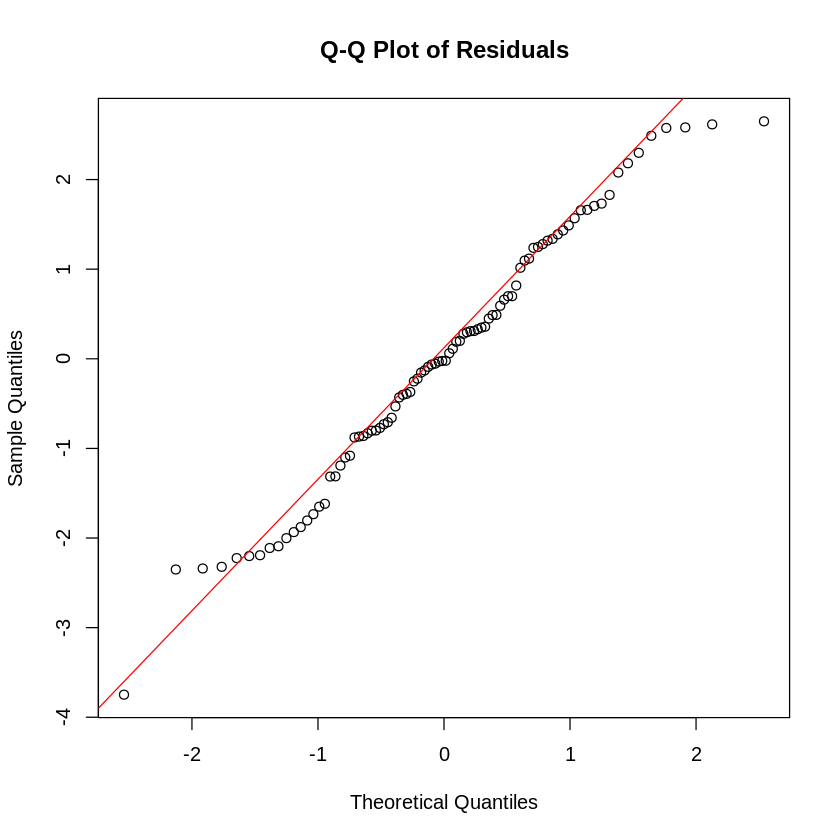

In [3]:
# Are the assumptions of normality and equal variances met? - 1 mark

# Compute residuals
data_long <- data_long %>%
  left_join(cell_means %>% rename(cell_mean = mean), by = c("Strategy", "Treatment"))
data_long$residual <- data_long$Value - data_long$cell_mean

# Normality: Visual inspection with Q-Q plot
par(mfrow = c(1, 1))
qqnorm(data_long$residual, main = "Q-Q Plot of Residuals")
qqline(data_long$residual, col = "red")

# Equal variances: Compute variance by Strategy-Treatment group
variances <- data_long %>%
  group_by(Strategy, Treatment) %>%
  summarise(variance = var(residual), .groups = "drop")
print(variances)

# Manual variance ratio (max/min)
var_ratio <- max(variances$variance) / min(variances$variance)
cat("Variance ratio (max/min):", var_ratio, "\n")

# Verification: Shapiro-Wilk test for normality
shapiro_test <- shapiro.test(data_long$residual)
print(shapiro_test)

# Verification: Bartlett's test for equal variances
bartlett_test <- bartlett.test(residual ~ interaction(Strategy, Treatment), data = data_long)
print(bartlett_test)

**Conclusions:**

-

-

-

### 1.3. A follow-up analysis

In [4]:
# Conduct a linear contrasts analysis - 2 marks
# Linear contrasts - 2 marks

# Compute treatment means (should already exist from Section 1.1)
treatment_means <- data_long %>%
  group_by(Treatment) %>%
  summarise(mean = mean(Value), .groups = "drop")
print(treatment_means)

# Parameters from Section 1.1
I <- 2  # Strategies
J <- 3  # Treatments
n <- 15  # Replicates per cell
MS_E <- 2.7541  # From corrected ANOVA table
df_E <- 84

# Contrast 1: Control vs. Drugs (DrugA + DrugB)/2
# Coefficients: DrugA (-0.5), DrugB (-0.5), Control (1)
c1 <- c(-0.5, -0.5, 1)
psi1 <- sum(c1 * treatment_means$mean)
var_psi1 <- MS_E * sum(c1^2) / (I * n)
se_psi1 <- sqrt(var_psi1)
t1 <- psi1 / se_psi1
p1 <- 2 * pt(abs(t1), df_E, lower.tail = FALSE)

# Contrast 2: DrugA vs. DrugB
# Coefficients: DrugA (1), DrugB (-1), Control (0)
c2 <- c(1, -1, 0)
psi2 <- sum(c2 * treatment_means$mean)
var_psi2 <- MS_E * sum(c2^2) / (I * n)
se_psi2 <- sqrt(var_psi2)
t2 <- psi2 / se_psi2
p2 <- 2 * pt(abs(t2), df_E, lower.tail = FALSE)

# Results table
contrasts_table <- data.frame(
  Contrast = c("Control vs Drugs", "DrugA vs DrugB"),
  Estimate = round(c(psi1, psi2), 4),
  SE = round(c(se_psi1, se_psi2), 4),
  t = round(c(t1, t2), 4),
  P = round(c(p1, p2), 4)
)
print(contrasts_table)

# A tibble: 3 × 2
  Treatment  mean
  <fct>     <dbl>
1 DrugA      6.29
2 DrugB      3.91
3 Control    1.75
          Contrast Estimate     SE       t P
1 Control vs Drugs  -3.3502 0.3711 -9.0280 0
2   DrugA vs DrugB   2.3830 0.4285  5.5613 0


**Conclusions:**

-

-

-

---

## 2. Interacting Two-way ANOVA

### 2.1. Analysis of the group, block and interaction effects

In [5]:
# Test the siginificance of group, block and interaction effects - 2 marks


# Verify data
print(head(data_long))

# Recompute means to ensure consistency
cell_means <- data_long %>%
  group_by(Strategy, Treatment) %>%
  summarise(mean = mean(Value), .groups = "drop")
print(cell_means)

strategy_means <- data_long %>%
  group_by(Strategy) %>%
  summarise(mean = mean(Value), .groups = "drop")

treatment_means <- data_long %>%
  group_by(Treatment) %>%
  summarise(mean = mean(Value), .groups = "drop")

grand_mean <- mean(data_long$Value)

# Parameters
I <- 2
J <- 3
n <- 15

# Sum of Squares
SS_A <- J * n * sum((strategy_means$mean - grand_mean)^2)
SS_B <- I * n * sum((treatment_means$mean - grand_mean)^2)
SS_cells <- n * sum((cell_means$mean - grand_mean)^2)
SS_AB <- SS_cells - SS_A - SS_B
SST <- sum((data_long$Value - grand_mean)^2)

# Fit the interaction model to get fitted values for SSE
model_interaction <- aov(Value ~ Strategy * Treatment, data = data_long)
data_long$fitted <- predict(model_interaction)
data_long$residual_interaction <- data_long$Value - data_long$fitted
SSE <- sum(data_long$residual_interaction^2)

# Degrees of Freedom
df_A <- I - 1
df_B <- J - 1
df_AB <- (I - 1) * (J - 1)
df_E <- I * J * (n - 1)
df_T <- I * J * n - 1

# Mean Squares
MS_A <- SS_A / df_A
MS_B <- SS_B / df_B
MS_AB <- SS_AB / df_AB
MS_E <- SSE / df_E

# F-statistics
F_A <- MS_A / MS_E
F_B <- MS_B / MS_E
F_AB <- MS_AB / MS_E

# P-values
p_A <- pf(F_A, df_A, df_E, lower.tail = FALSE)
p_B <- pf(F_B, df_B, df_E, lower.tail = FALSE)
p_AB <- pf(F_AB, df_AB, df_E, lower.tail = FALSE)

# ANOVA table
anova_table <- data.frame(
  Source = c("Strategy", "Treatment", "Interaction", "Error", "Total"),
  Df = c(df_A, df_B, df_AB, df_E, df_T),
  SS = round(c(SS_A, SS_B, SS_AB, SSE, SST), 4),
  MS = round(c(MS_A, MS_B, MS_AB, MS_E, NA), 4),
  F = round(c(F_A, F_B, F_AB, NA, NA), 4),
  P = round(c(p_A, p_B, p_AB, NA, NA), 4)
)
print(anova_table)

# Verification
print(summary(model_interaction))


# A tibble: 6 × 7
  Strategy Treatment Value cell_mean.x cell_mean.y cell_mean residual
  <fct>    <fct>     <dbl>       <dbl>       <dbl>     <dbl>    <dbl>
1 S1       DrugA      2.56        4.76        4.76      4.76   -2.20 
2 S1       DrugB      2.12        4.00        4.00      4.00   -1.88 
3 S1       Control    2.52        1.86        1.86      1.86    0.66 
4 S1       DrugA      5.04        4.76        4.76      4.76    0.279
5 S1       DrugB      5.66        4.00        4.00      4.00    1.66 
6 S1       Control    1.13        1.86        1.86      1.86   -0.73 
# A tibble: 6 × 3
  Strategy Treatment  mean
  <fct>    <fct>     <dbl>
1 S1       DrugA      4.76
2 S1       DrugB      4.00
3 S1       Control    1.86
4 S2       DrugA      7.82
5 S2       DrugB      3.82
6 S2       Control    1.64
       Source Df       SS       MS       F      P
1    Strategy  1  17.7956  17.7956  8.3885 0.0048
2   Treatment  2 309.6527 154.8263 72.9827 0.0000
3 Interaction  2  53.1444  26.5722 12.

**Conclusions:**

-

-

-

### 2.2. Residual analysis

In [8]:
# Are the assumptions of normality and equal variances met? - 1 mark

data_long$fitted <- predict(model_interaction)
data_long$residual_interaction <- data_long$Value - data_long$fitted

# Debug: Confirm residuals are correct
print(head(data_long$residual_interaction))
print(summary(data_long$residual_interaction))

# Fix Q-Q plot: Reset graphical parameters and try plotting
dev.off()  # Close any existing plotting devices
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)  # Reset margins
qqnorm(data_long$residual_interaction, main = "Q-Q Plot of Residuals (Interaction Model)")
qqline(data_long$residual_interaction, col = "red")

# If the plot still doesn't show points, save it to a file to force rendering
png("qqplot_interaction.png")
qqnorm(data_long$residual_interaction, main = "Q-Q Plot of Residuals (Interaction Model)")
qqline(data_long$residual_interaction, col = "red")
dev.off()

# Compute variances using the correct residuals (residual_interaction)
variances_interaction <- data_long %>%
  group_by(Strategy, Treatment) %>%
  summarise(variance = var(residual_interaction), .groups = "drop")
print(variances_interaction)

# Variance ratio
var_ratio_interaction <- max(variances_interaction$variance) / min(variances_interaction$variance)
cat("Variance ratio (max/min):", var_ratio_interaction, "\n")

# Shapiro-Wilk test
shapiro_test_interaction <- shapiro.test(data_long$residual_interaction)
print(shapiro_test_interaction)

# Bartlett's test
bartlett_test_interaction <- bartlett.test(residual_interaction ~ interaction(Strategy, Treatment), data = data_long)
print(bartlett_test_interaction)


         1          2          3          4          5          6 
-2.2013333 -1.8780000  0.6600000  0.2786667  1.6620000 -0.7300000 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.74800 -0.86633 -0.02267  0.00000  1.11250  2.65000 


null device 
          1

png 
  2

# A tibble: 6 × 3
  Strategy Treatment variance
  <fct>    <fct>        <dbl>
1 S1       DrugA         2.95
2 S1       DrugB         3.02
3 S1       Control       1.37
4 S2       DrugA         2.53
5 S2       DrugB         1.43
6 S2       Control       1.43
Variance ratio (max/min): 2.206627 

	Shapiro-Wilk normality test

data:  data_long$residual_interaction
W = 0.98195, p-value = 0.2463


	Bartlett test of homogeneity of variances

data:  residual_interaction by interaction(Strategy, Treatment)
Bartlett's K-squared = 5.026, df = 5, p-value = 0.4127



**Conclusions:**

-

-

-

### 2.3. A follow-up analysis

In [ ]:
# Conduct a linear contrasts analysis - 2 marks


**Conclusions:**

-

-

-

---

## Memo

- 10% of  marks are allocated for presentation quality of your work
- Data must be read directly from the provided github link.
- Don't forget to verify your work. Restart the kernel and re-run the whole notebook.
- Make a pdf copy of this notebook and submit together with the notebook.

---